# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
## **5장 분류와 군집화로 이해하는 지도 학습과 비지도 학습**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 5.1 k-NN 알고리즘과 분류문제

### 5.2 k-NN 알고리즘을 위한 데이터 준비하기

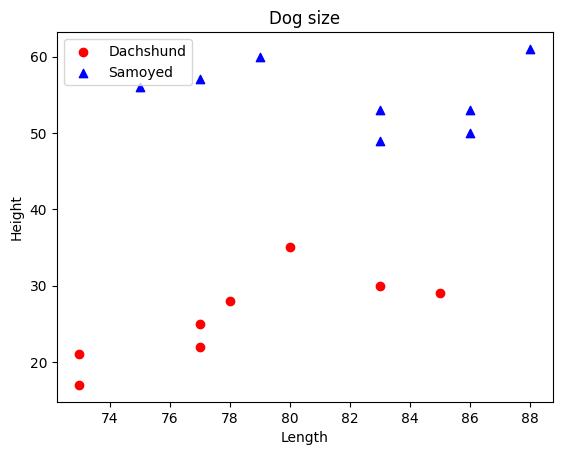

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 닥스훈트 개의 길이와 높이 데이터
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]
# 사모예드 개의 길이와 높이 데이터
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue',marker='^', label='Samoyed')

plt.xlabel('Length')              
plt.ylabel('Height')              
plt.title("Dog size")
plt.legend(loc='upper left')

plt.show()

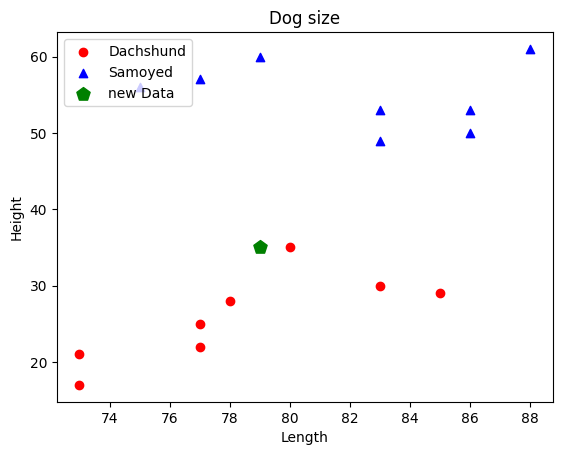

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 닥스훈트 개의 길이와 높이 데이터
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]
# 사모예드 개의 길이와 높이 데이터
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

newdata_length = [79]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height,c='blue',marker='^', label='Samoyed')

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')

plt.xlabel('Length')              
plt.ylabel('Height')              
plt.title("Dog size")
plt.legend(loc='upper left')

### 5.3 k-NN 분류기를 실행하자

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 닥스 훈트의 몸 길이와 몸 높이
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 19, 30, 21, 22, 17, 35]

# 사모예드의 몸 길이와 몸 높이
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]


In [4]:
d_data = np.column_stack((dach_length, dach_height))  # 하나의 column stack으로 생성
d_label = np.zeros(len(d_data))                       # 닥스훈트는 0으로 레이블링

In [5]:
s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data))                        # 사모예드는 1로 레이블링

In [6]:
newdata = [[79, 35]]

dogs = np.concatenate((d_data, s_data))
labels = np.concatenate((d_label, s_label))

In [7]:
dog_classes = {0:'Dachshund', 1:'Samoyed'} 

k = 3     
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)  

y_pred = knn.predict(newdata)

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

# 닥스 훈트의 몸 길이와 몸 높이
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 19, 30, 21, 22, 17, 35]

# 사모예드의 몸 길이와 몸 높이
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data))   # 사모예드는 1로 레이블링

newdata = [[79, 35],[18, 25], [50, 50], [100, 70]]

dogs = np.concatenate((d_data, s_data))
labels = np.concatenate((d_label, s_label))

dog_classes = {0:'Dachshund', 1:'Samoyed'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)

for i in range(len(newdata)):
  print('데이터', newdata[i], ', 판정 결과:', dog_classes[y_pred[i]])

데이터 [79, 35] , 판정 결과: Dachshund
데이터 [18, 25] , 판정 결과: Dachshund
데이터 [50, 50] , 판정 결과: Samoyed
데이터 [100, 70] , 판정 결과: Samoyed


### 도전문제 5.1 (K의 변화에 따른 분류기 결과의 변화)

In [9]:
other_data = [[82, 40]]
k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(other_data)
print('k =', k, ', 데이터', other_data, ', 판정 결과:', dog_classes[y_pred[0]])

k = 3 , 데이터 [[82, 40]] , 판정 결과: Dachshund


In [10]:
other_data = [[82, 40]]
k = 5     # k를 5로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(other_data)
print('k =', k, ', 데이터', other_data, ', 판정 결과:', dog_classes[y_pred[0]])

k = 5 , 데이터 [[82, 40]] , 판정 결과: Dachshund


In [11]:
other_data = [[82, 40]]
k = 9     # k를 9로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(other_data)
print('k =', k, ', 데이터', other_data, ', 판정 결과:', dog_classes[y_pred[0]])

k = 9 , 데이터 [[82, 40]] , 판정 결과: Samoyed


### 5.4 k-NN 활용 예제 - 붓꽃 데이터 준비하기

In [12]:
from sklearn.datasets import load_iris 

iris = load_iris() 
iris.data[:5]     # 최초 5개 데이터의 값을 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
print('iris 데이터의 형태:', iris.data.shape)

iris 데이터의 형태: (150, 4)


In [14]:
print('iris 데이터의 속성들:', iris.feature_names)

iris 데이터의 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print('iris 데이터의 레이블:', iris.target)

iris 데이터의 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 5.5 k-NN 활용 예제 - 붓꽃 데이터로 학습하기

In [17]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [18]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [19]:
X = iris_df.iloc[:, :4]         # data
y = iris_df.iloc[:, -1]         # target

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.3)                 # 여러 층으로 분할한 뒤 각 층별로 랜덤하게 데이터 추출 (stratify 옵션이 default인 None으로 되어있는데 그렇기에 원래 데이터의 분포와 유사하게 데이터를 추출)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.956


### 5.6 새로운 꽃에 대해서 모델을 적용하고 분류해 보자

In [21]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
iris = load_iris() 
k = 3
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [22]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 새로운 데이터를 제시해 보자. 
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor


In [23]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.960


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f83aad20fd0>)

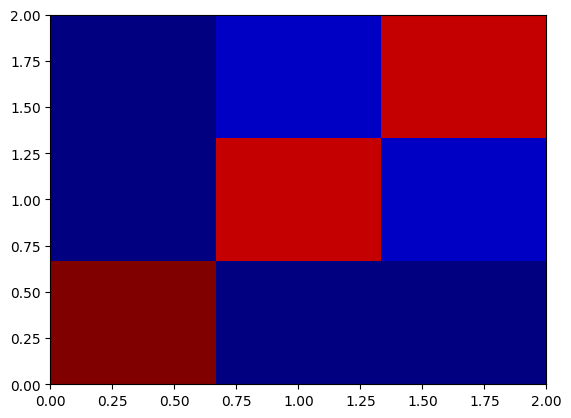

In [24]:
import matplotlib.pyplot as plt

plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)             # 예측/실제의 비율에 대한 jet 그래프

In [25]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

### 5.7 샘플링 편향과 성능 측정을 위한 평가지표

In [26]:
def classifier_A(length, height): # 입력값에 관계없이 'Samoyed'를 반환 -> 편향적인 성향을 보임 -> samoyed를 검출하는게 목적이라면 입력값이 무엇이든 100% 정확률을 보임 -> 성능지표의 필요성이 생김
    return 'Samoyed'

### 5.8 사이킷 런의 성능지표 함수들

In [27]:
target = np.array([0] * 10 + [1] * 10)
target  # 10개의 0(Negative), 10개의 1(Positive)를 가짐

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
pred = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, pred)                    # 혼동행렬 만들기 ([0][0] -> 실제 0을 0으로 예측한 경우, [0][1] -> 실제 0을 1으로 예측한 경우를 의미)

array([[7, 3],
       [2, 8]])

In [30]:
from sklearn.metrics import precision_score, recall_score
print('정밀도 :', precision_score(target, pred))            # True로 예측한 것들 중에서 실제로 True인 것들의 비율
print('재현률 :', recall_score(target, pred))               # True인 것들 중에서 True로 예측한 것들의 비율

from sklearn.metrics import accuracy_score, f1_score
print('정확도 :', accuracy_score(target, pred))             # 전체 경우 중에서 예측에 성공한 경우의 비율
print('F1 점수 :', f1_score(target, pred))

정밀도 : 0.7272727272727273
재현률 : 0.8
정확도 : 0.75
F1 점수 : 0.761904761904762


### 5.9 앙상블 - 기계학습의 민주주의   


### 5.10 군집화 기법의 이해

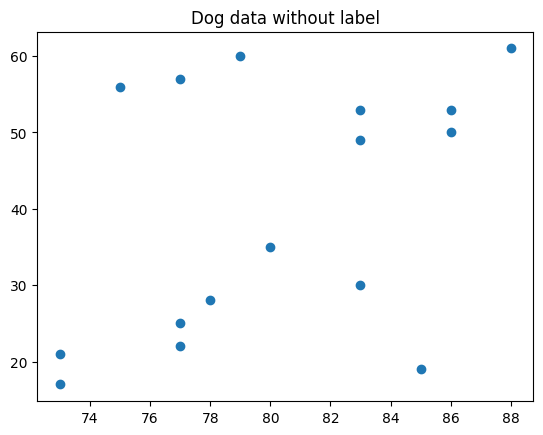

In [31]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# 닥스 훈트의 몸 길이와 몸 높이
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 19, 30, 21, 22, 17, 35]

# 사모예드의 몸 길이와 몸 높이
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data))   # 사모예드는 1로 레이블링

# 사모예드와 닥스 훈트의 길이, 높이 데이터는 생략한다
# 개의 길이와 높이를 각각 ndarray 형태로 만든다
dog_length = np.array(dach_length + samo_length) # 리스트를 이어 ndarray로
dog_height = np.array(dach_height + samo_height) # 리스트를 이어 ndarray로

dog_data = np.column_stack((dog_length, dog_height))

plt.title("Dog data without label")
plt.scatter(dog_length, dog_height)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


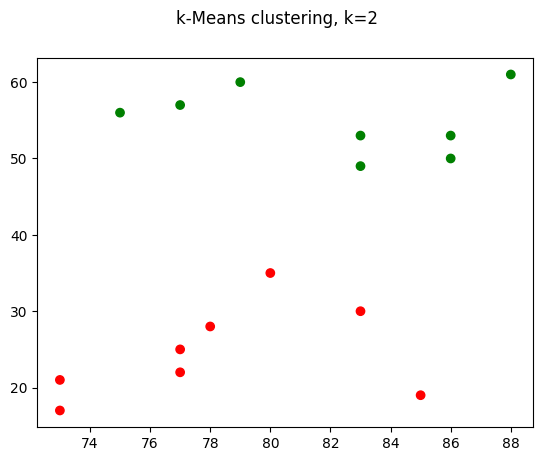

In [32]:
from sklearn import cluster

def kmeans_predict_plot(X, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    labels = model.predict(X)    
    colors = np.array(['red', 'green', 'blue', 'magenta'])
    plt.suptitle('k-Means clustering, k={}'.format(k))
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

kmeans_predict_plot(dog_data, k = 2)

### 5.11 k-평균 알고리즘 살펴보기

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


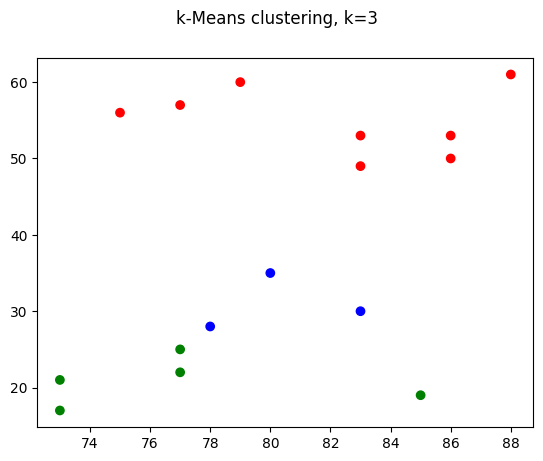

In [33]:
kmeans_predict_plot(dog_data, k = 3) # 3개의 군집 생성

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


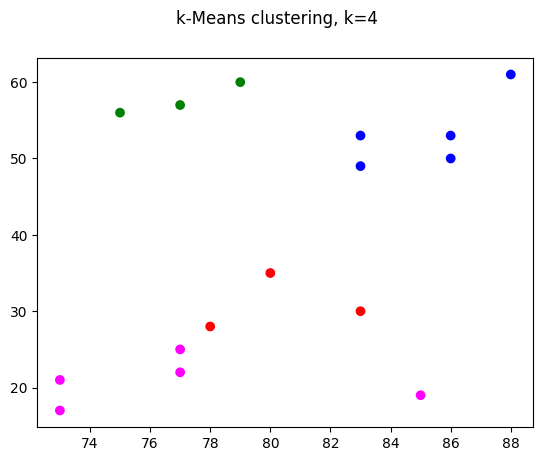

In [34]:
kmeans_predict_plot(dog_data, k = 4) # 4개의 군집 생성

### 5.12 k-평균 알고리즘과 k-NN 알고리즘의 비교: 지도 학습과 비지도 학습

---

### LAB 5-1: 붓꽃 데이터를 군집화하도록 하자

In [35]:
from sklearn import cluster
from sklearn.datasets import load_iris 
import numpy as np

iris = load_iris() 
k = len(iris.target_names)  # 몇 개의 군집으로 나눌지를 결정한다

In [36]:
print('kMeans() 군집화 적용...')
model = cluster.KMeans(n_clusters=k)          # init='k-means++' : 맨 처음 랜덤하게 군집점을 잡을때 군집점끼리 근접하게 위치하게 되면 군집화시키는데 너무 오래걸리기 때문에 군집점들이 최대한 멀리 위치하도록 잡아줌
model.fit(iris.data)
labels = model.predict(iris.data)

# 각 군집에 대한 레이블 빈도수 계산
print('군집화 결과 labels :', labels)
a_counts = np.bincount(labels[:50])           # np.bincount() : non negative integer로 구성된 Numpy array에서 각각의 발생 빈도수를 카운트하는데 사용되는 메소드
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])

kMeans() 군집화 적용...
군집화 결과 labels : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# 각 군집에 대한 중심 좌표 계산
d ={ 0: np.argmax(a_counts), 1: np.argmax(b_counts), 2 : np.argmax(c_counts)}       # np.argmax() : 최대값의 위치 반환해주는 메소드
new_labels = np.copy(labels)                                                        # np.copy() : Return an array copy of the given object

for old, new in d.items():
    new_labels[labels == old] = new                                                 # 새롭게 레이블링된 데이터 갱신

print('다시 레이블링을 한 후의 new_labels =', new_labels)

다시 레이블링을 한 후의 new_labels = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [38]:
from sklearn.metrics import accuracy_score
print('iris 데이터의 군집화 정확도:', accuracy_score(iris.target, new_labels))

iris 데이터의 군집화 정확도: 0.013333333333333334


## 5장 미니 프로젝트 A1 : 잡음제거: k-NN의 활용


In [39]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [40]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 24, 24, 3
images = []

for i in range(40):
    file = url + 'img{0:02d}.jpg'.format(i+1)    # 이미지 파일 이름을 만든다
    img = imread(file)                           # 이미지를 읽는다
    img = resize(img, (imgR,imgC, channel))      # 이미지의 크기를 변경한다
    images.append(img)                           # images 리스트에 담는다담는다

In [41]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

<Figure size 640x480 with 0 Axes>

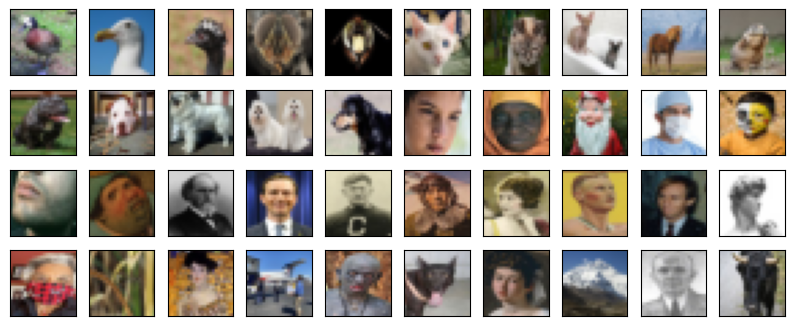

In [42]:
plot_images(4, 10, images)

<Figure size 640x480 with 0 Axes>

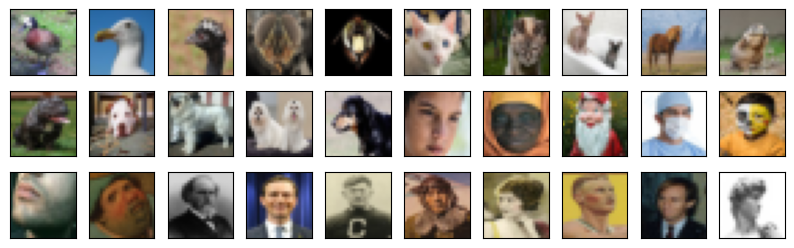

<Figure size 640x480 with 0 Axes>

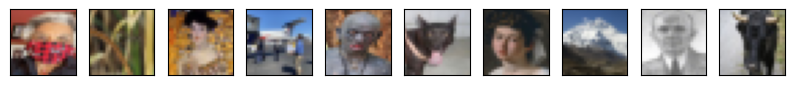

In [43]:
X = np.array(images[:30])
X_test = np.array(images[30:])
plot_images(3, 10, X)
plot_images(1, 10, X_test)

In [44]:
# 잡음을 생성하자
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.1
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy =  X_test+ np.random.randn(len(X_test),imgR,imgC,channel)*0.1
X_test_noisy = np.clip(X_test_noisy, 0, 1)

<Figure size 640x480 with 0 Axes>

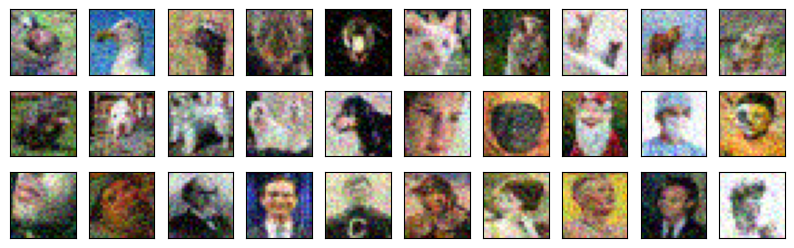

<Figure size 640x480 with 0 Axes>

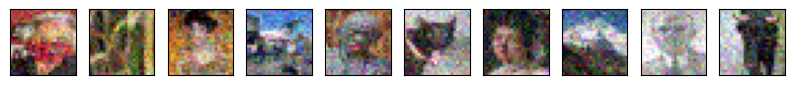

In [45]:
# 잡음이 추가된 이미지들을 그려보자
plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

In [46]:
X_noisy_flat = X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel) * 255, dtype=np.uint)

In [47]:
# 잡음 이미지를 입력으로 깨끗한 이미지를 정답으로 분류기를 훈련시켜 보자
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

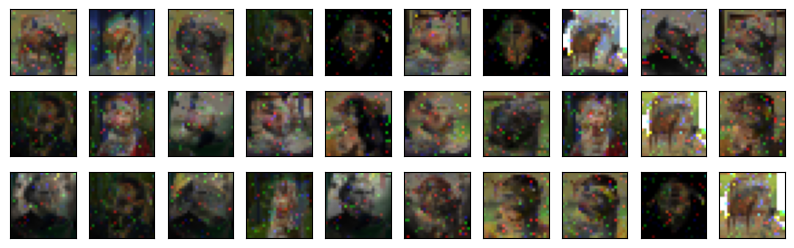

In [48]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

### 데이터 증강을 통해 kNN을 적용하자.

In [49]:
n_augmentation = 100
X_noisy_aug = X + np.random.rand(len(X), imgR, imgC, channel) * 0.2
y_label = np.array(X * 255, dtype = np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
    noisy_data = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
    X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis=0)
    y = np.append(y, y_label, axis = 0)

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

<Figure size 640x480 with 0 Axes>

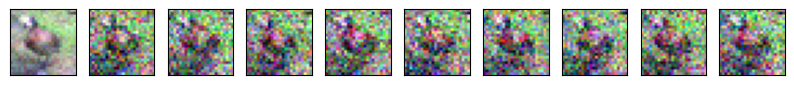

In [50]:
# 슬라이싱을 이용해서 데이터의 일부를 그려보자
plot_images(1, 10, X_noisy_aug[0:300:30])

In [51]:
# 늘어난 데이터로 훈련을 시켜보자
X_noisy_aug_flat = X_noisy_aug.reshape(-1, imgR*imgC*channel)
y_flat = y.reshape(-1, imgR*imgC*channel)

knn.fit(X_noisy_aug_flat, y_flat)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

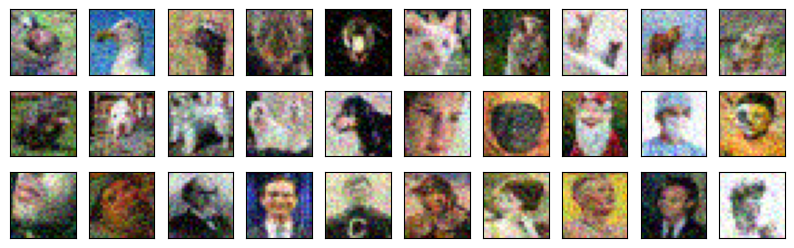

<Figure size 640x480 with 0 Axes>

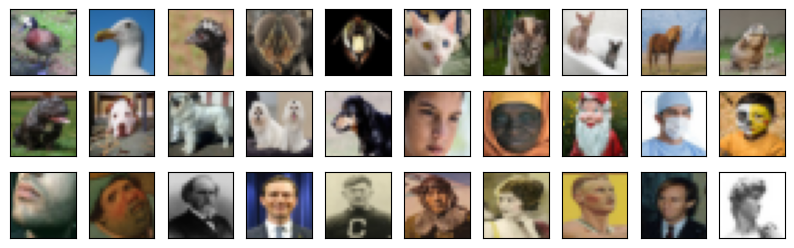

In [52]:
# 잡음이 포함된 X_noisy_flat 이미지를 kNN 알고리즘을 이용하여 잡음을 제거
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)

plot_images(3, 10, X_noisy)
plot_images(3, 10, denoised_result)

### 8. 검증 데이터로 일반화 능력을 살펴보자

<Figure size 640x480 with 0 Axes>

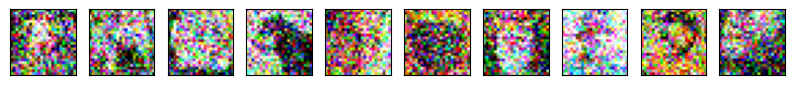

<Figure size 640x480 with 0 Axes>

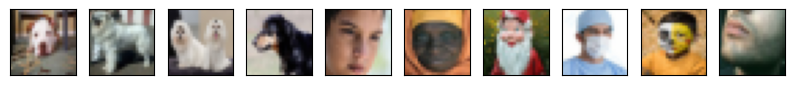

In [53]:
rndidx = np.random.randint(0, 20)
data = X[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel)*0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0, 255)

plot_images(1, 10, data)
plot_images(1, 10, denoised)

<Figure size 640x480 with 0 Axes>

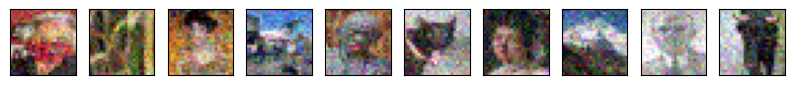

<Figure size 640x480 with 0 Axes>

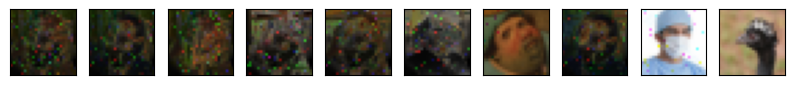

In [54]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

In [55]:
### 이미지 데이터를 증강시키기 #### (data augmentation : 갖고 있는 데이터셋을 여러 가지 방법으로 augment하여 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법)
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [56]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [57]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.1

In [58]:
n_augmentation = 500
for _ in range(n_augmentation):
    new_y = it.next()
    new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.1
    y_aug = np.append(y_aug, new_y)    
    X_aug = np.append(X_aug, new_X)

y_aug = np.array(y_aug * 255, dtype = np.uint)
y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)

<Figure size 640x480 with 0 Axes>

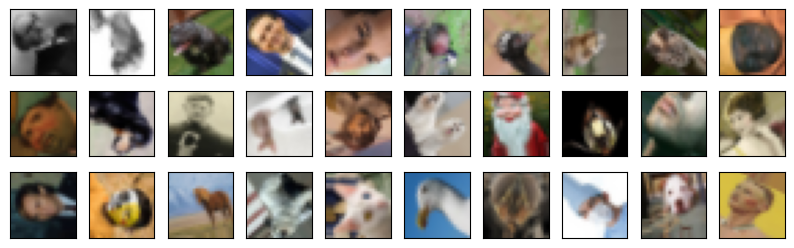

In [59]:
y_aug = np.clip(y_aug, 0,255)
X_aug = np.clip(X_aug, 0, 1)
plot_images(3, 10, y_aug[30:])

In [60]:
X_aug_flat = X_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(X_aug_flat, y_aug_flat)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

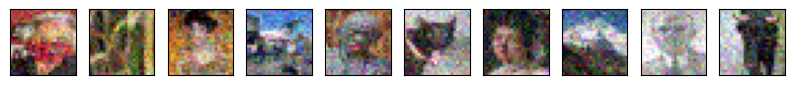

<Figure size 640x480 with 0 Axes>

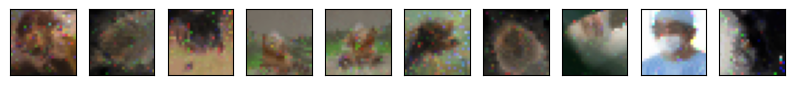

In [61]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

<Figure size 640x480 with 0 Axes>

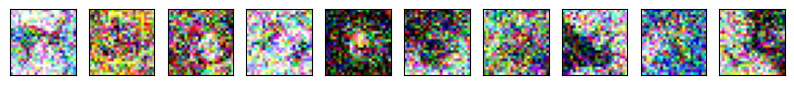

<Figure size 640x480 with 0 Axes>

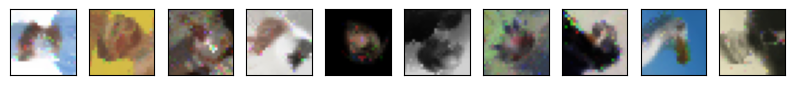

In [62]:
# 보다 더 강한 잡음을 추가하도록 하자
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel)*0.4
testX = np.clip(testX, 0, 1)
denoised = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, testX)
plot_images(1, 10, denoised)